# --------------------------------------- Workshop #3 -------------------------------------


* This workshop includes marked tasks that comprise 25% of your final mark in this module. 

* You need to read the examples in the 'Lecture #3 - examples' notebook to complete the tasks. 

# Task

## TASK 3.1: Apply four classifiers discussed in Lecture #3, i.e. Support Vector Machine (SVM), Decision Tree (DT), Random Forest (RF), and K-nearest neighbours (KNN) classifiers to the adult_WS#3 dataset available on Canvas to predict the income column. Calculate the confusion matrix and evaluation metrics for all classifiers. Plot the features' importance values, determine the three most important features (i.e. columns) which have the highest impact on the income and report them in the report cell  (25%). 

## NOTE1: To decrease the processing time, use an ordinal encoder for both nominal and ordinal input columns. You don't need to apply the one hot encoder to nominal columns. 

## NOTE2 You are expected to improve your models in any way possible to get as high accuracy as possible.

## NOTE3: You should add comments on your code wherever necessary and briefly explain what the code is doing

## NOTE4: Completing the report cell is required only for reporting the three most important features. Other explanations are optional. 

## NOTE5: You will still get some marks if your code doesn't run, but you have written some codes and have added comments on the code. 


In [69]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)####################
#importing relevant libraries
import pandas as pd
import numpy as np

#Reading my Csv file into a DataFrame
data = pd.read_csv('C:/Users/HP/Downloads/adult_WS#3.csv')

#Printing data
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19,Private,63363,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
9996,53,Private,58535,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
9997,30,Private,342709,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
9998,41,Self-emp-not-inc,134724,Assoc-voc,11,Married-civ-spouse,Other-service,Wife,White,Female,3103,0,40,United-States,>50K


In [70]:
#checking sum of null values in columns
data.isna().sum()

age                 0
workclass         175
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        175
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     61
income              0
dtype: int64

In [71]:
#dropping null values
data.dropna(inplace=True)

#rechecking columns for null values
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [72]:
#Identifying and Replacing wrong values with modes of columns
#creating a list and assigning into a variable
wrong_value_columns = ['workclass', 'occupation', 'native-country']

#Identifying and filling wrong values in the columns
for column in wrong_value_columns:
    #calculating the mode from each column
    mode_value = data[column].mode().iloc[0]
    #filling in the mode values
    data.loc[data[column] == '?', column] = mode_value
    #printing to verify
    print(data[column].unique())

['Private' 'Local-gov' 'Self-emp-inc' 'Federal-gov' 'Self-emp-not-inc'
 'State-gov' 'Without-pay' 'Never-worked']
['Exec-managerial' 'Craft-repair' 'Prof-specialty' 'Handlers-cleaners'
 'Sales' 'Other-service' 'Farming-fishing' 'Transport-moving'
 'Protective-serv' 'Adm-clerical' 'Tech-support' 'Machine-op-inspct'
 'Priv-house-serv' 'Armed-Forces']
['United-States' 'Scotland' 'Columbia' 'Haiti' 'Canada' 'El-Salvador'
 'China' 'Cuba' 'Philippines' 'Germany' 'Hong' 'Mexico' 'Puerto-Rico'
 'Dominican-Republic' 'South' 'India' 'Jamaica' 'Vietnam' 'England'
 'Cambodia' 'Portugal' 'Japan' 'Iran' 'Italy' 'Greece' 'Taiwan' 'Thailand'
 'Ecuador' 'Poland' 'Outlying-US(Guam-USVI-etc)' 'Hungary' 'Guatemala'
 'France' 'Nicaragua' 'Honduras' 'Laos' 'Ireland' 'Peru' 'Yugoslavia'
 'Trinadad&Tobago']


In [73]:
#setting rows and column display options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
data.head(100)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,Private,100903,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
5,37,Private,186808,HS-grad,9,Never-married,Sales,Unmarried,White,Male,0,0,40,United-States,<=50K
6,34,Private,339142,HS-grad,9,Separated,Handlers-cleaners,Unmarried,White,Female,0,0,40,United-States,<=50K
7,38,Private,101387,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,43,United-States,<=50K
8,62,Private,166691,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
9,50,Local-gov,50178,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,4064,0,55,United-States,<=50K


In [74]:
#preparing data for classification
#Extracting input and output data
X=data.drop('income',axis=1)
y=data['income']

In [75]:
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder()

# perform ordinal encoding
X = encoder.fit_transform(X)

print(X)

[[1.200e+01 3.000e+00 5.601e+03 ... 0.000e+00 3.900e+01 3.700e+01]
 [1.900e+01 3.000e+00 6.899e+03 ... 0.000e+00 4.400e+01 3.700e+01]
 [8.000e+00 3.000e+00 1.484e+03 ... 0.000e+00 2.400e+01 3.700e+01]
 ...
 [1.300e+01 3.000e+00 7.604e+03 ... 0.000e+00 3.900e+01 3.700e+01]
 [2.400e+01 5.000e+00 2.550e+03 ... 0.000e+00 3.900e+01 3.700e+01]
 [4.000e+00 3.000e+00 6.456e+03 ... 0.000e+00 3.900e+01 3.700e+01]]


In [76]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


scaler = MinMaxScaler()
X_normalised=scaler.fit_transform(X)
df_normalised=pd.DataFrame(X_normalised)
print(X_normalised)

[[0.17391304 0.42857143 0.67238896 ... 0.         0.45348837 0.94871795]
 [0.27536232 0.42857143 0.82821128 ... 0.         0.51162791 0.94871795]
 [0.11594203 0.42857143 0.17815126 ... 0.         0.27906977 0.94871795]
 ...
 [0.1884058  0.42857143 0.91284514 ... 0.         0.45348837 0.94871795]
 [0.34782609 0.71428571 0.30612245 ... 0.         0.45348837 0.94871795]
 [0.05797101 0.42857143 0.77503001 ... 0.         0.45348837 0.94871795]]


In [77]:
#printing y
y

0        >50K
1       <=50K
2       <=50K
3        >50K
4       <=50K
        ...  
9995    <=50K
9996    <=50K
9997    <=50K
9998     >50K
9999    <=50K
Name: income, Length: 9765, dtype: object

In [78]:
#importing LabelEncoder to encode target y (income)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#encoding y
y = le.fit_transform(y)

In [79]:
#printing y
y

array([1, 0, 0, ..., 0, 1, 0])

In [80]:
# splittig the dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalised, y, test_size=0.3, random_state=42)

In [81]:
# Step 1: defining the classification models 
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

SVM = svm.SVC()
DT=DecisionTreeClassifier()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()

In [82]:
#Step 2: training the models 
SVM.fit(X_train, y_train)
DT.fit(X_train, y_train)
RF.fit(X_train, y_train)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [83]:
#Step 3: prediction
y_pred1=SVM.predict(X_test)
y_pred2=DT.predict(X_test)
y_pred3=RF.predict(X_test)
y_pred4=KNN.predict(X_test)

Text(0.5, 1.0, 'DT')

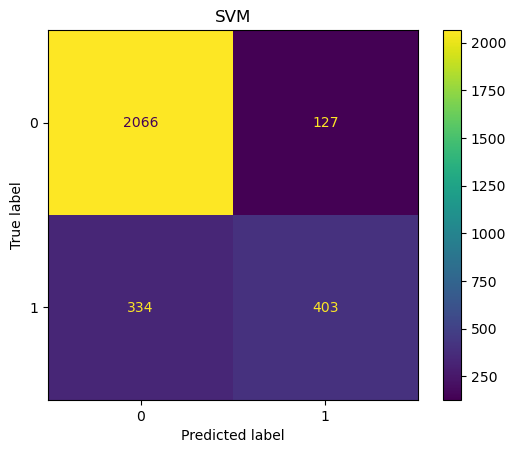

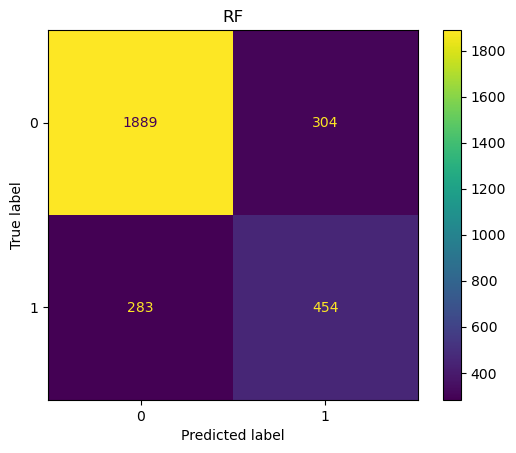

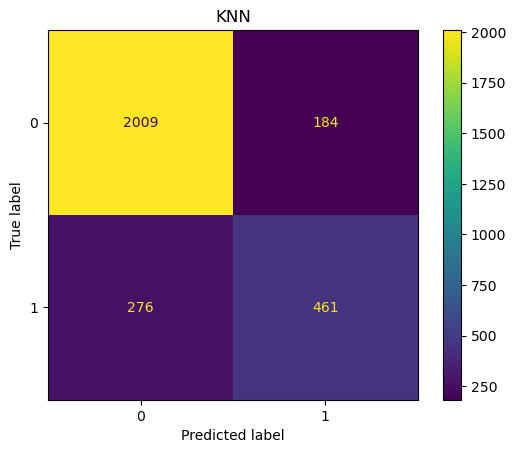

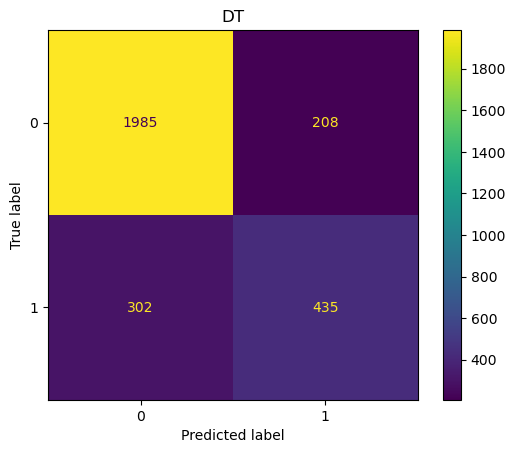

In [84]:
# Creating the confusion matrics for all classifiers' predictions
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, y_pred1, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=SVM.classes_)
disp.plot()
plt.title("SVM")

cm2 = confusion_matrix(y_test, y_pred2, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=RF.classes_)
disp.plot()
plt.title("RF")


cm3 = confusion_matrix(y_test, y_pred3, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=KNN.classes_)
disp.plot()
plt.title("KNN")

cm4 = confusion_matrix(y_test, y_pred4, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=DT.classes_)
disp.plot()
plt.title("DT")

In [85]:
# This function takes the confusion matrix (cm) from the cell above and produces all evaluation matrix
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [86]:
#printing the evaluation metrics for all classifiers
print('SVM metrics\n')
confusion_metrics(cm1)
print('\n\n')

print('DT metrics\n')
confusion_metrics(cm2)
print('\n\n')

print('RF metrics\n')
confusion_metrics(cm3)
print('\n\n')

print('KNN metrics\n')
confusion_metrics(cm4)
print('\n\n')

SVM metrics

True Positives: 403
True Negatives: 2066
False Positives: 127
False Negatives: 334
--------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity: 0.55
Specificity: 0.94
Precision: 0.94
f_1 Score: 0.69



DT metrics

True Positives: 454
True Negatives: 1889
False Positives: 304
False Negatives: 283
--------------------------------------------------
Accuracy: 0.8
Mis-Classification: 0.2
Sensitivity: 0.62
Specificity: 0.86
Precision: 0.86
f_1 Score: 0.72



RF metrics

True Positives: 461
True Negatives: 2009
False Positives: 184
False Negatives: 276
--------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity: 0.63
Specificity: 0.92
Precision: 0.92
f_1 Score: 0.74



KNN metrics

True Positives: 435
True Negatives: 1985
False Positives: 208
False Negatives: 302
--------------------------------------------------
Accuracy: 0.83
Mis-Classification: 0.17
Sensitivity: 0.59
Specificity: 0.91
Precisi

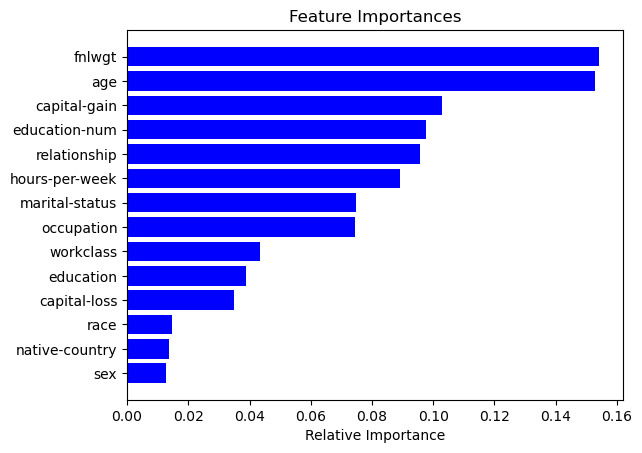

In [87]:
# Getting the most important features
features = data.columns
importances = RF.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [88]:
importances

array([0.15273639, 0.04353164, 0.15434991, 0.03878737, 0.09764714,
       0.07487165, 0.07438061, 0.09560222, 0.01482751, 0.012835  ,
       0.10278341, 0.03478378, 0.08905701, 0.01380636])